In [2]:
#pip install mlxtend

In [3]:

#pip install xgboost

In [4]:
#pip install lightgbm
from time import time

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import seaborn
from sklearn.model_selection import train_test_split
from matplotlib import style
seaborn.set(style='ticks')
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)
# import the ML algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from mlxtend.regressor import StackingRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics.scorer import make_scorer
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from lightgbm import LGBMRegressor

# Pretty display for notebooks
%matplotlib inline


In [6]:
df=pd.read_csv(r'Walmart_Store_sales.csv')

In [7]:
df.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [8]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
NAs = pd.concat([df.isnull().sum()], axis=1, keys=['Missing Values count'])
NAs[NAs.sum(axis=1) > 0]

,Missing Values count


In [10]:
pd.DataFrame(df.dtypes, columns=['Type'])


,Type
Store,int64
Date,object
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


Converting date into datetime format

In [11]:
df.Date=pd.to_datetime(df.Date)

In [12]:
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


adding more features from date to check the correlations between them and other variables

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['DayOfTheWeek'] = df['Date'].dt.dayofweek
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [14]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfTheWeek,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17,6,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48,3,2


## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends,
anomalies, patterns, or relationships within the data.

### Correlations
Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”


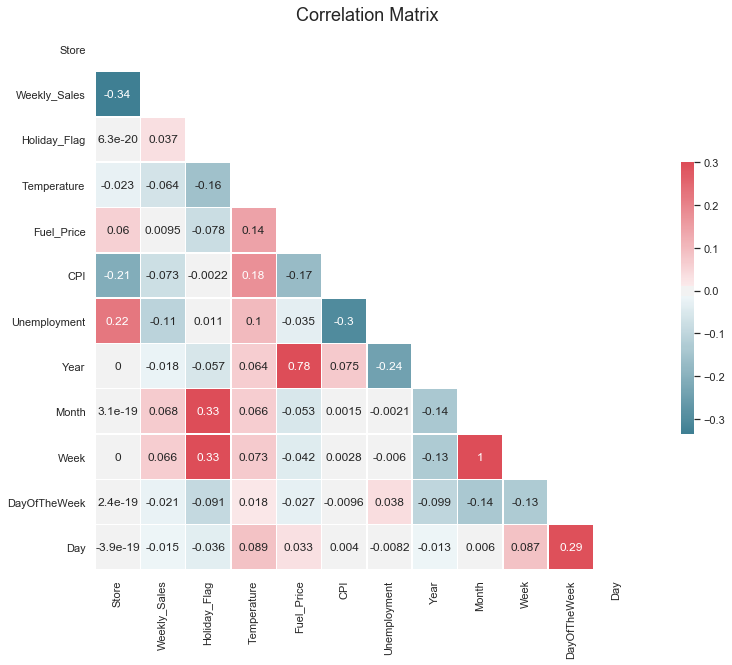

In [15]:
sns.set(style="white")

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

We can see that Year and Fuel price are strongly Correlated and thus will bias the calculations in prediction hence we will have to drop the Fuel Price feature.


In [16]:
##making plots of features with WeeklySales

def make_plot(feature):
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1,2)
    sns.boxplot(y=df.Weekly_Sales, x=df[feature], ax=fig.add_subplot(gs[0,0]))
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(feature, fontsize=16)
    sns.stripplot(y=df.Weekly_Sales, x=df[feature], ax=fig.add_subplot(gs[0,1]))
    plt.ylabel('Sales', fontsize=16)
    plt.xlabel(feature, fontsize=16)
    fig.show()


## Weekly_Sales X Holiday_FLag

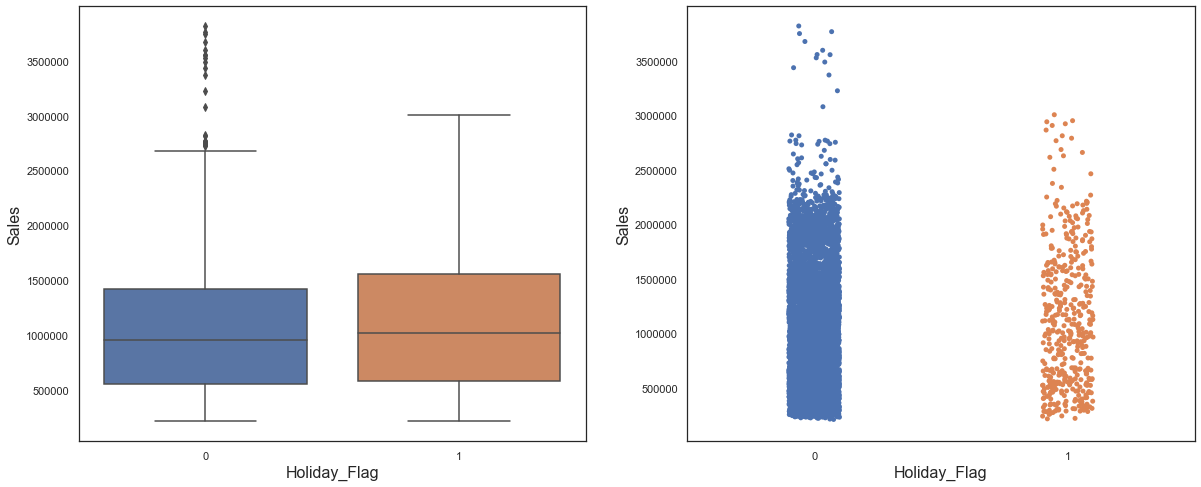

In [17]:
make_plot('Holiday_Flag')

It can be seen that when it is a Holiday week, usually the sales are high and in a consistent range.
During non Holiday weeks the sales are lesser and have more outliers.

## Weekly Sales X Temperature,Unemployment,CPI

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


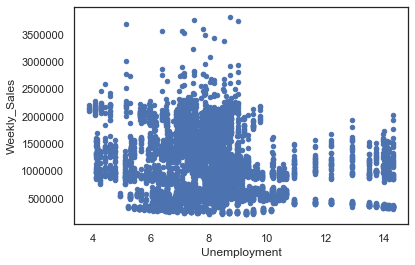

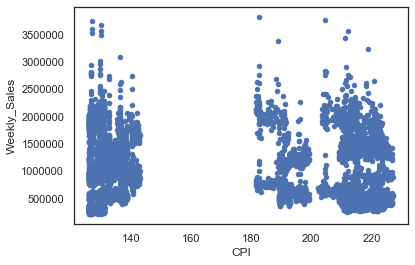

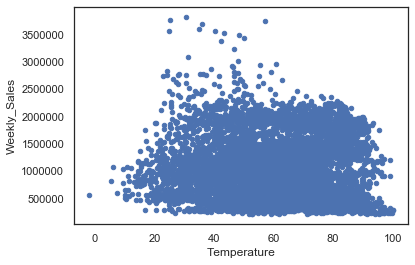

In [18]:
def scatter_plot_var(var):
    data = pd.concat([df['Weekly_Sales'],df[var] ], axis=1)
    data.plot.scatter(x=var, y='Weekly_Sales')
scatter_plot_var("Unemployment")
scatter_plot_var("CPI")
scatter_plot_var("Temperature")


## Which Store has the maximum sales in q3

In [19]:
walmart_data_Q32012 = df[(pd.to_datetime(df['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(df['Date']) <= pd.to_datetime('09-30-2012'))]
walmart_data_growth = walmart_data_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012 {}".format(walmart_data_growth.idxmax(),walmart_data_growth.max()))

Store Number 4 has Good Quartely Growth in Q3'2012 25652119.35


In [20]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week',
       'DayOfTheWeek', 'Day'],
      dtype='object')

In [21]:
y = df['Weekly_Sales']

X = df[['Store','Holiday_Flag','Year','CPI', 'Unemployment','Month','Temperature','Week','DayOfTheWeek','Day']] ##Dropping Fuel PRice feature

In [22]:

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)

## Machine Learning

Model Functions
As we can see , the evaluation is based on Weighted Mean Absolute Error (WMAE), with a weight of 5 for Holiday Weeks and 1 otherwise.



In [23]:
def WMAE(dataset, real, predicted):
    weights = df.Holiday_Flag.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

The model chosen for this project is the Random Forest Regressor. It is an ensemble method and uses multiples decision trees ('n_estimators' parameter of the model) to determine final output, which is an average of the outputs of all trees.

The algorithm chooses a feature to be the Root Node and make a split of the samples. The function to measure the quality of a split we can choose and pass as a parameter. The splitting continues until the Internal Node has less samples than 'min_samples_split' to split and become a Leaf Node. And the 'min_samples_leaf' tells the minimum number of samples to be considered as a Leaf Node. There is also an important parameter called 'max_features' and it is the maximum number of features considered when the node is requiring the best split. The number of layers is the 'max_depth' parameter.

It is important to tune these parameters to find the best predictor and to minimize overfitting.

The functions for Random Forest, Parameters Tuning and Cross Validation are:

In [24]:
def random_forest(n_estimators, max_depth):
    result = []
    for estimator in n_estimators:
        for depth in max_depth:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', n_estimators:', estimator, ', max_depth:', depth)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=estimator, max_depth=depth)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_test)
                wmaes_cv.append(WMAE(X_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv))
            result.append({'Max_Depth': depth, 'Estimators': estimator, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [25]:
n_estimators = [56, 58, 60]
max_depth = [25, 27, 30]

random_forest(n_estimators, max_depth)

k: 1 , n_estimators: 56 , max_depth: 25
k: 2 , n_estimators: 56 , max_depth: 25
k: 3 , n_estimators: 56 , max_depth: 25
k: 4 , n_estimators: 56 , max_depth: 25
WMAE: 23990.01
k: 1 , n_estimators: 56 , max_depth: 27
k: 2 , n_estimators: 56 , max_depth: 27
k: 3 , n_estimators: 56 , max_depth: 27
k: 4 , n_estimators: 56 , max_depth: 27
WMAE: 26325.1575
k: 1 , n_estimators: 56 , max_depth: 30
k: 2 , n_estimators: 56 , max_depth: 30
k: 3 , n_estimators: 56 , max_depth: 30
k: 4 , n_estimators: 56 , max_depth: 30
WMAE: 25285.184999999998
k: 1 , n_estimators: 58 , max_depth: 25
k: 2 , n_estimators: 58 , max_depth: 25
k: 3 , n_estimators: 58 , max_depth: 25
k: 4 , n_estimators: 58 , max_depth: 25
WMAE: 25166.1925
k: 1 , n_estimators: 58 , max_depth: 27
k: 2 , n_estimators: 58 , max_depth: 27
k: 3 , n_estimators: 58 , max_depth: 27
k: 4 , n_estimators: 58 , max_depth: 27
WMAE: 25432.41
k: 1 , n_estimators: 58 , max_depth: 30
k: 2 , n_estimators: 58 , max_depth: 30
k: 3 , n_estimators: 58 , max_d

,Max_Depth,Estimators,WMAE
0,25,56,23990.0100
1,27,56,26325.1575
2,30,56,25285.1850
3,25,58,25166.1925
4,27,58,25432.4100
5,30,58,25074.8625
6,25,60,26604.8750
7,27,60,26534.2475
8,30,60,25511.2925


Max_Depth = 27 and Estimators = 58 

In [26]:
def random_forest_II(n_estimators, max_depth, max_features):
    result = []
    for feature in max_features:
        wmaes_cv = []
        for i in range(1,5):
            print('k:', i, ', max_features:', feature)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
            RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=feature)
            RF.fit(X_train, y_train)
            predicted = RF.predict(X_test)
            wmaes_cv.append(WMAE(X_test, y_test, predicted))
        print('WMAE:', np.mean(wmaes_cv))
        result.append({'Max_Feature': feature, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [27]:
max_features = [2, 3, 4, 5, 6, 7]

random_forest_II(n_estimators=58, max_depth=27, max_features=max_features)

k: 1 , max_features: 2
k: 2 , max_features: 2
k: 3 , max_features: 2
k: 4 , max_features: 2
WMAE: 67170.4325
k: 1 , max_features: 3
k: 2 , max_features: 3
k: 3 , max_features: 3
k: 4 , max_features: 3
WMAE: 41192.229999999996
k: 1 , max_features: 4
k: 2 , max_features: 4
k: 3 , max_features: 4
k: 4 , max_features: 4
WMAE: 30808.165
k: 1 , max_features: 5
k: 2 , max_features: 5
k: 3 , max_features: 5
k: 4 , max_features: 5
WMAE: 25601.73
k: 1 , max_features: 6
k: 2 , max_features: 6
k: 3 , max_features: 6
k: 4 , max_features: 6
WMAE: 24146.74
k: 1 , max_features: 7
k: 2 , max_features: 7
k: 3 , max_features: 7
k: 4 , max_features: 7
WMAE: 24023.190000000002


,Max_Feature,WMAE
0,2,67170.4325
1,3,41192.2300
2,4,30808.1650
3,5,25601.7300
4,6,24146.7400
5,7,24023.1900


Max_Feature = 7

In [28]:
def random_forest_III(n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf):
    result = []
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            wmaes_cv = []
            for i in range(1,5):
                print('k:', i, ', min_samples_split:', split, ', min_samples_leaf:', leaf)
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                RF = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, 
                                           min_samples_leaf=leaf, min_samples_split=split)
                RF.fit(X_train, y_train)
                predicted = RF.predict(X_test)
                wmaes_cv.append(WMAE(X_test, y_test, predicted))
            print('WMAE:', np.mean(wmaes_cv))
            result.append({'Min_Samples_Leaf': leaf, 'Min_Samples_Split': split, 'WMAE': np.mean(wmaes_cv)})
    return pd.DataFrame(result)

In [29]:
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]

random_forest_III(n_estimators=58, max_depth=27, max_features=7, 
                  min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

k: 1 , min_samples_split: 2 , min_samples_leaf: 1
k: 2 , min_samples_split: 2 , min_samples_leaf: 1
k: 3 , min_samples_split: 2 , min_samples_leaf: 1
k: 4 , min_samples_split: 2 , min_samples_leaf: 1
WMAE: 23814.324999999997
k: 1 , min_samples_split: 2 , min_samples_leaf: 2
k: 2 , min_samples_split: 2 , min_samples_leaf: 2
k: 3 , min_samples_split: 2 , min_samples_leaf: 2
k: 4 , min_samples_split: 2 , min_samples_leaf: 2
WMAE: 26640.59
k: 1 , min_samples_split: 2 , min_samples_leaf: 3
k: 2 , min_samples_split: 2 , min_samples_leaf: 3
k: 3 , min_samples_split: 2 , min_samples_leaf: 3
k: 4 , min_samples_split: 2 , min_samples_leaf: 3
WMAE: 27751.592500000002
k: 1 , min_samples_split: 3 , min_samples_leaf: 1
k: 2 , min_samples_split: 3 , min_samples_leaf: 1
k: 3 , min_samples_split: 3 , min_samples_leaf: 1
k: 4 , min_samples_split: 3 , min_samples_leaf: 1
WMAE: 25455.46
k: 1 , min_samples_split: 3 , min_samples_leaf: 2
k: 2 , min_samples_split: 3 , min_samples_leaf: 2
k: 3 , min_samples_s

,Min_Samples_Leaf,Min_Samples_Split,WMAE
0,1,2,23814.3250
1,2,2,26640.5900
2,3,2,27751.5925
3,1,3,25455.4600
4,2,3,24393.6850
5,3,3,27104.2050
6,1,4,25080.2050
7,2,4,24449.3575
8,3,4,27780.8325


Min_Samples_Leaf = 2 and Min_Samples_Split = 4

### The Final Model

#### With this model we are getting the WMAE  24449, which is optimum to not have an overfit model.

In [31]:

RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=7, min_samples_split=4, min_samples_leaf=2)
RF.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=27, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=58, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)